#### In this Notebook we will be running complete data preprocessing steps on the given housing data for analysis and then we will be running a regression analysis on the processed data


In [1]:
pwd

'C:\\Users\\shubh\\OneDrive\\Documents\\'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df =  pd.read_csv(r"C:\Users\shubh\OneDrive\Documents\Data Files\House_Price.csv", header=0)

##### Exploring the data for insights

In [4]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [5]:
df.shape

(506, 19)

In [6]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

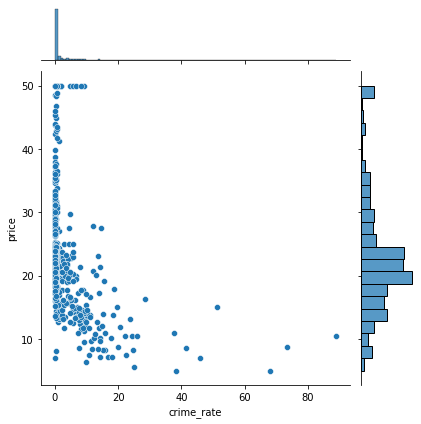

In [8]:
sns.jointplot(x='crime_rate', y='price', data=df )

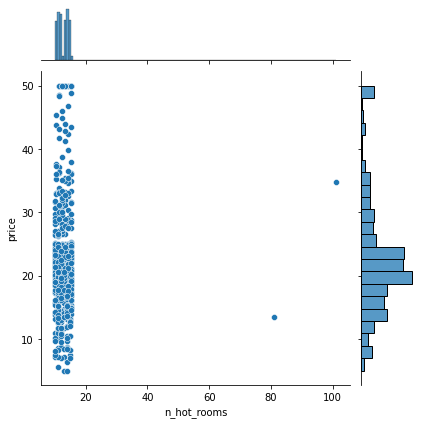

In [9]:
 sns.jointplot(x="n_hot_rooms", y="price", data=df)

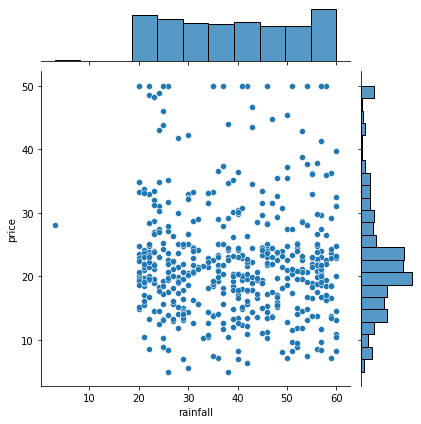

In [10]:
sns.jointplot(x='rainfall', y='price', data=df)

<AxesSubplot:xlabel='airport', ylabel='count'>

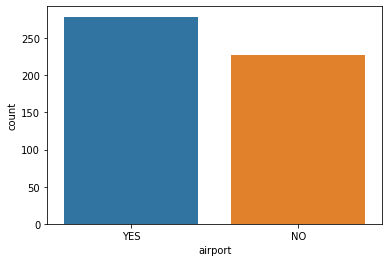

In [11]:
sns.countplot(x='airport', data=df)

<AxesSubplot:xlabel='waterbody', ylabel='count'>

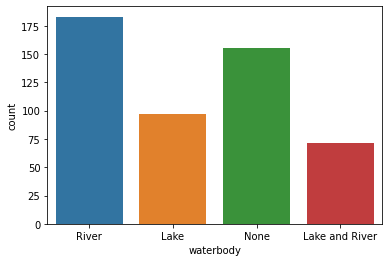

In [12]:
sns.countplot(x='waterbody', data=df)

<AxesSubplot:xlabel='bus_ter', ylabel='count'>

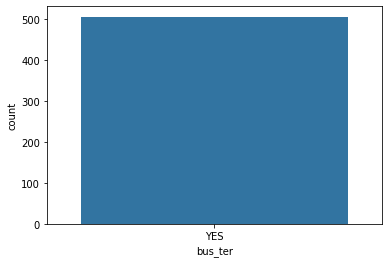

In [13]:
sns.countplot(x='bus_ter', data=df)

1. Missing value in n_hot_rooms
2. Outliers in crime rate
3. Outlier in rainfall & in n_hot_rooms
4. bus_ter takes only one value ie. not impactful
5. crime rate values are skewed

##### Detecting and Dealing with Outlier Datapoints

* For all the values greater than 99 percentile capped at 3 x median.
* For all the values lesser than 1 percentile capped at 0.3 x median.

In [14]:
np.percentile(df.n_hot_rooms, [99])[0]

15.39952

In [15]:
uv = np.percentile(df.n_hot_rooms, [99])[0]

In [16]:
df[(df.n_hot_rooms>uv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [17]:
df.n_hot_rooms[(df.n_hot_rooms>3*uv)]=3*uv

<ipython-input-17-7716cc877e49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[(df.n_hot_rooms>3*uv)]=3*uv


In [18]:
np.percentile(df.rainfall, [99])[0]

60.0

In [19]:
lv=np.percentile(df.rainfall, [1])[0]

In [20]:
df[(df.rainfall<lv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019


In [21]:
df.rainfall[(df.rainfall<0.3*lv)]=0.3*lv

<ipython-input-21-3133273e85f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rainfall[(df.rainfall<0.3*lv)]=0.3*lv


In [22]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

* ##### Tranforming the variables & Bi-variate analysis

1. Dealing with the crime rate variable.
    since the plot shows exponential characteristics we will take log of all values to convert it into linear distribution

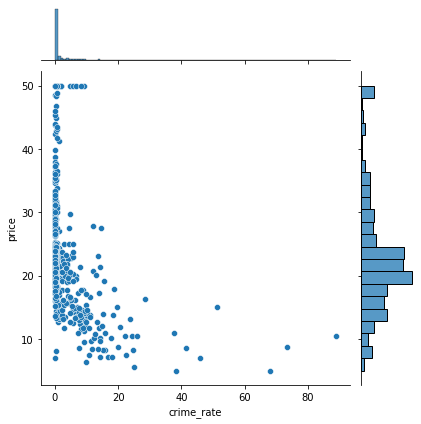

In [23]:
 sns.jointplot(x="crime_rate", y="price", data=df)

In [24]:
df.crime_rate = np.log(1+df.crime_rate)

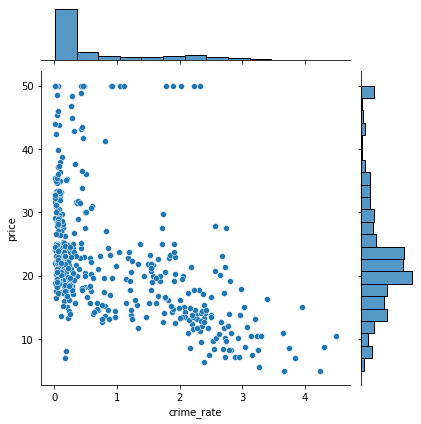

In [25]:
 sns.jointplot(x="crime_rate", y="price", data=df)

2. Dealing with Dist variable.
    Since there are 4 variable showing distances from employemnt hub & all of them are affecting price in similar way so we calculate their average and subsitute that value insted of 4 differnt values. Same can be done with replacing the 
    values with minimum value or maximum value

In [26]:
df['avg_dist']= (df.dist1+df.dist2+df.dist3+df.dist4)/4

In [27]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464939,2.688778,12.497221,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,12.127500


In [28]:
del df['dist1']

In [29]:
del df['dist2']

In [30]:
del df['dist3']

In [31]:
del df['dist4']

In [32]:
del df['bus_ter'] #singular value hence no impact on output for this perticular dataset  

In [33]:
del df['rainfall']

In [34]:
df.head(4)

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,parks,avg_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.19200,River,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,0.046146,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,0.045764,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.26720,Lake,0.047151,6.0650


##### Creating dummy variable for all categorical variable

In [35]:
df=pd.get_dummies(df)

In [36]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,0.049347,4.0875,0,1,0,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,0.046146,4.9675,1,0,1,0,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,0.045764,4.9675,1,0,0,0,1,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,0.047151,6.0650,0,1,1,0,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,0.039474,6.0625,1,0,1,0,0,0


In [37]:
del df['airport_NO']

In [38]:
del df['waterbody_None']

In [39]:
df.head(1)

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.0063,32.31,0.538,6.575,65.2,24.7,4.98,5.48,11.192,0.049347,4.0875,1,0,0,1


* #####  Corelation Analysis


In [40]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.466527,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.017007,-0.391574,0.249289,0.182867,0.036233,-0.037497,0.071751
crime_rate,-0.466527,1.000000,0.660283,0.707587,-0.288784,0.559591,-0.390052,0.608970,-0.004089,0.056570,0.638951,-0.586371,-0.134486,-0.025390,0.009076,-0.060099
resid_area,-0.484754,0.660283,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.003761,0.707635,-0.708022,-0.115401,-0.026590,0.051649,-0.098976
air_qual,-0.429300,0.707587,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,0.007238,0.915544,-0.769247,-0.073903,-0.046393,0.013849,-0.037772
room_num,0.696304,-0.288784,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.014583,-0.282817,0.205241,0.163774,-0.004195,0.010554,0.046251
age,-0.377999,0.559591,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.013918,0.673850,-0.747906,0.005101,0.003452,-0.004354,-0.088609
teachers,0.505655,-0.390052,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.037007,-0.187004,0.232452,0.069437,0.048717,-0.046981,0.094256
poor_prop,-0.740836,0.608970,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.017036,0.552310,-0.496967,-0.095054,0.003197,0.020620,-0.109004
n_hos_beds,0.108880,-0.004089,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.003130,-0.071272,-0.027871,-0.006365,0.042278,0.059482,-0.074148
n_hot_rooms,0.017007,0.056570,-0.003761,0.007238,0.014583,0.013918,-0.037007,0.017036,-0.003130,1.000000,0.023757,-0.020700,-0.055338,0.037925,0.014755,-0.064096


Parks and air quality show high positive co-relation so will lead to multi colinearity hence we need to drop one of them

In [41]:
del df['parks']

 * ###  Building Simple Linear Regressor Model
  ##### here just one imdependent variable is fitted to our dependent variable that is room_num to price respectively the same process can be done for all the other independent variable

In [42]:
import statsmodels.api as sn

In [43]:
X = sn.add_constant(df['room_num'])

In [44]:
lm = sn.OLS(df['price'],X).fit()

In [45]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           1.31e-74
Time:                        00:41:29   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
y=df['price']

In [48]:
X=df[['room_num']]

In [49]:
lm2= LinearRegression()

In [50]:
lm2.fit(X,y)

LinearRegression()

In [51]:
print(lm2.intercept_, lm2.coef_)

-34.6592431230972 [9.09966966]


In [52]:
lm2.predict(X)

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

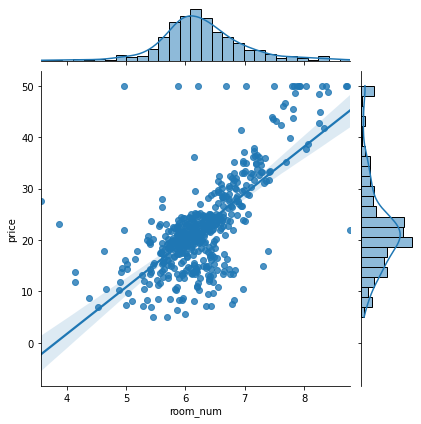

In [53]:
sns.jointplot(x=df['room_num'], y=df['price'], data=df, kind='reg')

* ### Multiple Linear Regression

In [54]:
X_multi = df.drop("price",axis=1)

In [55]:
X_multi.head()

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,4.0875,1,0,0,1
1,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,4.9675,0,1,0,0
2,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,4.9675,0,0,0,0
3,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,6.0650,1,1,0,0
4,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,6.0625,0,1,0,0


In [56]:
y_multi = df['price']

In [57]:
X_multi_cons = sn.add_constant(X_multi)

In [58]:
X_multi_cons.head()

,const,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,1.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,4.0875,1,0,0,1
1,1.0,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,4.9675,0,1,0,0
2,1.0,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,4.9675,0,0,0,0
3,1.0,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,6.0650,1,1,0,0
4,1.0,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,6.0625,0,1,0,0


In [59]:
lm_multi = sn.OLS(y_multi, X_multi_cons).fit()

In [60]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     90.34
Date:                Wed, 24 Feb 2021   Prob (F-statistic):          6.48e-126
Time:                        00:41:31   Log-Likelihood:                -1517.0
No. Observations:                 506   AIC:                             3064.
Df Residuals:                     491   BIC:                             3127.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -5.9316      5.226     -1.135      0.257     -16.199       4.336
crime_rate                   0.0193      0.348      0.055      0.956      -0.664       0.703
resid_area                  -0.0428      0.058     -0.744      0.457      -0.156       0.070
air_qual                   -15.6437      3.993     -3.918      0.000     -23.490      -7.798
room_num                     4.0002      0.426      9.390      0.000       3.163       4.837
age                         -0.0051      0.014     -0.378      0.705      -0.032       0.022
teachers                     1.0050      0.122      8.234      0.000       0.765       1.245
poor_prop                   -0.5787      0.053    -10.989      0.000      -0.682      -0.475
n_hos_beds                   0.3379      0.152      2.225      0.027       0.039       0.636
n_hot_rooms                  0.0928      0.082      1.130      0.259      -0.069       0.254
avg_dist                    -1.2078      0.189     -6.407      0.000      -1.578      -0.837
airport_YES                  1.1355      0.454      2.500      0.013       0.243       2.028
waterbody_Lake               0.2696      0.642      0.420      0.675      -0.991       1.531
waterbody_Lake and River    -0.6202      0.710     -0.873      0.383      -2.015       0.775
waterbody_River             -0.2861      0.547     -0.523      0.601      -1.360       0.788
==============================================================================
Omnibus:                      182.553   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              827.931
Skew:                           1.552   Prob(JB):                    1.65e-180
Kurtosis:                       8.443   Cond. No.                     2.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### The F_stat value is very low showing there is a strong colinearity
* air_qual, room_num, teachers, poor_prop,avg_dist have P=0 ie least so there are the independent variables affecting most heavily on the dependent variable. So these are the variable most significant for the regression model we will be building

In [61]:
lm3 = LinearRegression()

In [62]:
lm3.fit(X_multi, y_multi)

LinearRegression()

In [63]:
 print(lm3.intercept_, lm3.coef_)

-5.931610206422292 [ 1.92695292e-02 -4.28113296e-02 -1.56436930e+01  4.00021855e+00
 -5.14301839e-03  1.00497052e+00 -5.78708446e-01  3.37946954e-01
  9.28028853e-02 -1.20780895e+00  1.13547621e+00  2.69589116e-01
 -6.20166895e-01 -2.86083986e-01]


 ###### Test Train Splitting

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.3, random_state=0)

In [66]:
lm4 = LinearRegression()

In [67]:
lm4.fit(X_train, y_train)

LinearRegression()

In [68]:
y_test_4 = lm4.predict(X_test)

In [69]:
y_train_4 = lm4.predict(X_train)

In [70]:
from sklearn.metrics import r2_score

In [71]:
r2_score(y_test, y_test_4)

0.6502732505433477

In [72]:
r2_score(y_train, y_train_4 )

0.7442784665753364

In [73]:
import matplotlib.pyplot as plt

### We were able to predict the price with 65.027% accuracy on the test dataset

##### Further improving our model perfomance by regularization using Ridge Regression and Subset selection using Lasso

In [74]:
from sklearn import preprocessing

In [75]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [76]:
X_train_s = scaler.transform(X_train)

In [77]:
X_test_s = scaler.transform(X_test)

In [78]:
from sklearn.linear_model import Ridge

In [79]:
lm_r = Ridge(alpha=0.5)
lm_r.fit(X_train_s, y_train)

Ridge(alpha=0.5)

In [80]:
r2_score(y_test, lm_r.predict(X_test_s))

0.650167572641307

In [81]:
from sklearn.model_selection import validation_curve

In [82]:
param_range = np.logspace(-2,8,100)

In [83]:
train_score, test_score = validation_curve(Ridge(), X_train_s, y_train, "alpha", param_range, scoring='r2')

D:\Anaconda\envs\conda1\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=alpha, param_range=[1.00000000e-02 1.26185688e-02 1.59228279e-02 2.00923300e-02
 2.53536449e-02 3.19926714e-02 4.03701726e-02 5.09413801e-02
 6.42807312e-02 8.11130831e-02 1.02353102e-01 1.29154967e-01
 1.62975083e-01 2.05651231e-01 2.59502421e-01 3.27454916e-01
 4.13201240e-01 5.21400829e-01 6.57933225e-01 8.30217568e-01
 1.04761575e+00 1.32194115e+00 1.66810054e+00 2.10490414e+00
 2.65608778e+00 3.35160265e+00 4.22924287e+00 5.33669923e+00
 6.73415066e+00 8.49753436e+00 1.07226722e+01 1.35304777e+01
 1.70735265e+01 2.15443469e+01 2.71858824e+01 3.43046929e+01
 4.32876128e+01 5.46227722e+01 6.89261210e+01 8.69749003e+01
 1.09749877e+02 1.38488637e+02 1.74752840e+02 2.20513074e+02
 2.78255940e+02 3.51119173e+02 4.43062146e+02 5.59081018e+02
 7.05480231e+02 8.90215085e+02 1.12332403e+03 1.41747416e+03
 1.78864953e+03 2.25701972e+03 2.84803587e+03 3.59381366e+03
 4.53487851e+03 5.7223

In [84]:
print(train_score)
print(test_score)

[[7.43885909e-01 7.60519574e-01 7.33016401e-01 7.63143694e-01
  7.36101751e-01]
 [7.43885908e-01 7.60519574e-01 7.33016401e-01 7.63143693e-01
  7.36101750e-01]
 [7.43885906e-01 7.60519573e-01 7.33016400e-01 7.63143692e-01
  7.36101749e-01]
 [7.43885904e-01 7.60519571e-01 7.33016398e-01 7.63143691e-01
  7.36101747e-01]
 [7.43885900e-01 7.60519569e-01 7.33016396e-01 7.63143689e-01
  7.36101745e-01]
 [7.43885894e-01 7.60519566e-01 7.33016392e-01 7.63143685e-01
  7.36101741e-01]
 [7.43885885e-01 7.60519560e-01 7.33016385e-01 7.63143680e-01
  7.36101735e-01]
 [7.43885869e-01 7.60519551e-01 7.33016375e-01 7.63143671e-01
  7.36101726e-01]
 [7.43885845e-01 7.60519537e-01 7.33016359e-01 7.63143657e-01
  7.36101710e-01]
 [7.43885807e-01 7.60519515e-01 7.33016333e-01 7.63143634e-01
  7.36101686e-01]
 [7.43885745e-01 7.60519480e-01 7.33016292e-01 7.63143599e-01
  7.36101648e-01]
 [7.43885648e-01 7.60519423e-01 7.33016227e-01 7.63143542e-01
  7.36101586e-01]
 [7.43885493e-01 7.60519334e-01 7.330161

In [86]:
train_mean = np.mean(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)

In [87]:
max(test_mean)

0.7152676017505113

As you can see. Previously the r2 value was 0.65 and after ridge ridge regression now its 0.71

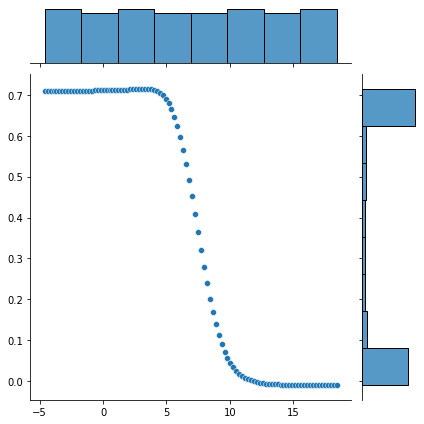

In [88]:
sns.jointplot(x=np.log(param_range), y=test_mean)

In [90]:
np.where(test_mean==max(test_mean))

(array([34], dtype=int64),)

In [92]:
param_range[34]

27.1858824273294

In [93]:
lm_r_best = Ridge(alpha=param_range[34])

In [94]:
lm_r_best.fit(X_train_s, y_train)

Ridge(alpha=27.1858824273294)

In [95]:
r2_score(y_test, lm_r_best.predict(X_test_s))

0.6432244865064471

In [96]:
r2_score(y_train, lm_r_best.predict(X_train_s))

0.7413592151471124

Since this data set is comparatively small and and the no of independent variables is also comparatively smaller this change gets quite significant when we have dataset with observation is order of 1000s and variables in order of 100s

Runnig Lasso is exact same as Ridge just replace ridge with lasso